# 1. Modelo de precios hedónicos (OLS)

## 1.1. Obtención y limpieza de datos

Vamos a cargar las librerías necesarias e importar el archivo que usamos para el *ejercicio 1*.

In [1]:
import pandas as pd #permite manipular los dataframes, que serían el equivalente a los Excel
import numpy as np #en caso se necesiten cálculos numéricos, como p. ej. encontrar valores nulos 
import statsmodels.api as sm #para elaborar modelos OLS

base=pd.read_csv('rawdata/clases/habitaclia4043.csv')
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4043 entries, 0 to 4042
Columns: 204 entries, Unnamed: 0 to EPC_G_emision_2023
dtypes: float64(189), int64(1), object(14)
memory usage: 6.3+ MB


Hay 204 columnas. Por cuestiones de tiempo, vamos a realizar un modelo con algunas variables que he identificado previamente.

In [2]:
selected_columns = ["Ln_total_pr","EPC_A_emision", "EPC_B_emision", "EPC_C_emision", "EPC_D_emision", "EPC_E_emision",
                    "EPC_F_emision", "EPC_G_emision", "Muestra_2023", "superficie", "CT_renta_alta_CPA",
                    "superficie_2", "Estado_contemporaneidad_calidad", "bool_ascensor",
                    "bool_piscina_comunitaria", "bool_calefaccion", "desplaz_ponderado",
                    "Income_Household_2016", "FIRE_pr", "Ausencia_singulares_presencia_arm_cocina",
                    "grand_terr_20m2", "Year_After_2007", "CT_renta_meda_CPA", "DP2e", "dum_mar_200m",
                    "bool_aire_acondicionado", "Precio_red", "ratio_bano_hab", "Year_1982_2006",
                    "opin_ruido_si_pr", "Dist_CBD2", "H_tamaviv", "interac_planta"]

#Ojo: H_tamaviv no está en el diccionario
base = base[selected_columns].sort_index(axis=1)

In [3]:
base.describe()

,Ausencia_singulares_presencia_arm_cocina,CT_renta_alta_CPA,CT_renta_meda_CPA,DP2e,Dist_CBD2,EPC_A_emision,EPC_B_emision,EPC_C_emision,EPC_D_emision,EPC_E_emision,...,bool_calefaccion,bool_piscina_comunitaria,desplaz_ponderado,dum_mar_200m,grand_terr_20m2,interac_planta,opin_ruido_si_pr,ratio_bano_hab,superficie,superficie_2
count,3.859000e+03,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,...,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4034.000000,4043.000000,4043.000000
mean,-5.707910e-17,0.232315,0.442707,13.209126,4.343123,0.017809,0.013604,0.021766,0.051942,0.343062,...,0.545387,0.035370,26.473732,0.008410,0.076428,1.901311,43.963124,0.532729,94.123671,11160.502597
std,9.998704e-01,0.810922,0.497574,2.388901,2.643334,0.132271,0.115853,0.145937,0.221937,0.474791,...,0.497997,0.184735,2.752761,0.091329,0.265715,3.891452,6.907413,0.263269,47.977146,16292.814549
min,-4.340271e+00,-1.179396,-1.185862,5.047646,0.067320,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,10.158544,0.000000,0.000000,-10.000000,19.501782,0.000000,18.000000,324.000000
25%,-3.389485e-01,-0.506506,0.098744,11.534675,2.401680,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,24.250529,0.000000,0.000000,-1.000000,39.131721,0.333333,65.000000,4225.000000
50%,2.874292e-01,0.265795,0.506271,12.899869,3.657355,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,26.401750,0.000000,0.000000,3.000000,43.690805,0.500000,81.000000,6561.000000
75%,5.854683e-01,0.944086,0.813529,14.513569,5.893800,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,28.303374,0.000000,0.000000,5.000000,48.798104,0.666667,107.000000,11449.000000
max,2.251097e+00,1.742331,1.594470,20.540556,12.125419,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,33.543398,1.000000,1.000000,17.000000,64.808852,4.000000,495.000000,245025.000000


Ahora veamos si hay filas con filas vacías en alguna columna. Tendremos que excluirlas de nuestro dataframe.

In [4]:
# Encontrar las filas que contienen valores NaN o valores nulos
filas_con_nan_o_null = base[base.isnull().any(axis=1)]

print("Las filas que contienen valores NaN o valores nulos son:")
print(filas_con_nan_o_null)

Las filas que contienen valores NaN o valores nulos son:
      Ausencia_singulares_presencia_arm_cocina  CT_renta_alta_CPA  \
172                                        NaN          -1.052790   
193                                        NaN          -0.585461   
203                                        NaN          -1.047643   
204                                        NaN          -1.099398   
230                                        NaN           0.979399   
...                                        ...                ...   
3842                                 -2.893689          -0.694372   
3919                                 -0.791703          -0.575089   
3960                                       NaN          -0.840727   
3967                                 -0.350966          -0.951903   
4008                                       NaN          -1.027218   

      CT_renta_meda_CPA       DP2e  Dist_CBD2  EPC_A_emision  EPC_B_emision  \
172           -0.176751  10.870856 

Hay 191 filas con valores *NaN* o *null*. De hecho, si revisan el resultado de la celda con `base.info()`, se darán cuenta que nos indica en qué columna están esos valores.

In [5]:
base.info() #Antes ejecutamos esta línea, pero ahora 'base ya tiene sólo 32 columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4043 entries, 0 to 4042
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Ausencia_singulares_presencia_arm_cocina  3859 non-null   float64
 1   CT_renta_alta_CPA                         4043 non-null   float64
 2   CT_renta_meda_CPA                         4043 non-null   float64
 3   DP2e                                      4043 non-null   float64
 4   Dist_CBD2                                 4043 non-null   float64
 5   EPC_A_emision                             4043 non-null   float64
 6   EPC_B_emision                             4043 non-null   float64
 7   EPC_C_emision                             4043 non-null   float64
 8   EPC_D_emision                             4043 non-null   float64
 9   EPC_E_emision                             4043 non-null   float64
 10  EPC_F_emision                       

Aquí tenemos dos opciones: 
1. Eliminamos las dos columnas con 3859 observaciones.
2. Eliminamos las filas con observaciones vacías y nos quedamos con las dos columnas.

Para este ejemplo, procedemos con la opción 2, dado que esas dos columnas son de especial interés.

In [6]:
#Para no sobreescribir, creo una nueva variable: 'df'
df = base.replace([np.inf, -np.inf], np.nan).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3852 entries, 0 to 4042
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Ausencia_singulares_presencia_arm_cocina  3852 non-null   float64
 1   CT_renta_alta_CPA                         3852 non-null   float64
 2   CT_renta_meda_CPA                         3852 non-null   float64
 3   DP2e                                      3852 non-null   float64
 4   Dist_CBD2                                 3852 non-null   float64
 5   EPC_A_emision                             3852 non-null   float64
 6   EPC_B_emision                             3852 non-null   float64
 7   EPC_C_emision                             3852 non-null   float64
 8   EPC_D_emision                             3852 non-null   float64
 9   EPC_E_emision                             3852 non-null   float64
 10  EPC_F_emision                            

Lo que buscamos en este caso es encontrar el mejor modelo para **predecir `Ln_total_pr`**. Será necesario subdividir las observaciones en dos muestras: una de entrenamiento (75-80%) y otra de testeo (20-25%), de lo contrario se basarían en los mismos datos que se utilizaron para entrenar el modelo (100%) y no proporcionarían una estimación imparcial de su rendimiento en datos no vistos.

## 1.2. Muestras de entrenamiento y testeo

Primero, cargamos las nuevas librerías que usaremos para esta tarea y la futura elaboración del modelo.

In [7]:
from sklearn.model_selection import train_test_split #para dividir datos en entrenamiento y testeo
import seaborn as sns #para hacer gráficos, p. ej. el de distribución de una variable
import matplotlib.pyplot as plt #complemento de sns para gráficos 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #para calcular parámetros del modelo
from scipy import stats

Ahora dividimos las muestras.

In [8]:
X_ols = df.drop('Ln_total_pr', axis=1)  # Todas las columnas excepto 'Ln_total_pr'
y_ols = df['Ln_total_pr']  # Columna 'Ln_total_pr'

In [9]:
# Dividir los datos en conjuntos de entrenamiento y testeo
X_trainOLS, X_testOLS, y_trainOLS, y_testOLS = train_test_split(
                                                    X_ols, y_ols, 
                                                    test_size=0.25, 
                                                    random_state=42 #Puede ser cualquier número
                                                    ) 

## 1.3. Distribución de la variable

Veamos si nuestra variable dependiente tiene una distribución normal.

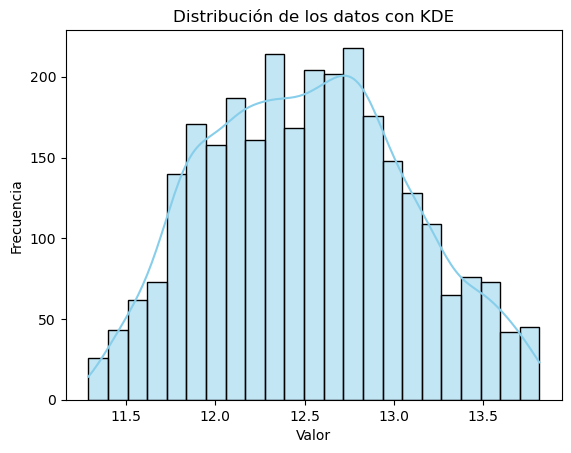

In [10]:
# Crear un histograma de los datos con KDE
sns.histplot(y_trainOLS, ## aquí almacené mi Y entrenamiento ## 
             kde=True, color='skyblue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de los datos con KDE')

# Mostrar el histograma
plt.show()

La gráfica **parece** indicar que sí tenemos algo cercano a la normalidad. Veamos si las pruebas de Kolmogorov y Shapiro nos lo confirman.

In [11]:
# Crear una lista vacía para almacenar los resultados
resultados_list = []


# Iterar sobre las columnas del DataFrame
for columna in df.columns: ## 'df' es el nombre de mi dataframe ##
    # Realizar la prueba de Shapiro-Wilk
    shapiro_test_statistic, shapiro_p_value = stats.shapiro(df[columna]) ## revisa 'df' ##
    
    # Realizar la prueba de Kolmogorov-Smirnov
    kolmogorov_test_statistic, kolmogorov_p_value = stats.kstest(df[columna], ## revisa 'df' ##
                                                                 'norm') 
    
    # Determinar si los datos son normales
    es_normal = 1 if shapiro_p_value > 0.05 or kolmogorov_p_value > 0.05 else 0
    
    # Agregar los resultados a la lista
    resultados_list.append({
        'Variable': columna,
        'Shapiro-Wilk p-value': shapiro_p_value,
        'Kolmogorov-Smirnov p-value': kolmogorov_p_value,
        'Es normal': es_normal
    })
    

# Convertir la lista de resultados en un DataFrame
normalidad = pd.DataFrame(resultados_list)

print(normalidad)

                                    Variable  Shapiro-Wilk p-value  \
0   Ausencia_singulares_presencia_arm_cocina          0.000000e+00   
1                          CT_renta_alta_CPA          5.733382e-35   
2                          CT_renta_meda_CPA          1.178524e-18   
3                                       DP2e          5.553070e-28   
4                                  Dist_CBD2          2.291895e-38   
5                              EPC_A_emision          0.000000e+00   
6                              EPC_B_emision          0.000000e+00   
7                              EPC_C_emision          0.000000e+00   
8                              EPC_D_emision          0.000000e+00   
9                              EPC_E_emision          0.000000e+00   
10                             EPC_F_emision          0.000000e+00   
11                             EPC_G_emision          0.000000e+00   
12           Estado_contemporaneidad_calidad          1.049941e-30   
13                  

Ninguna tiene distribución normal. Cuando revisemos los supuestos hay que ver si esto está afectando al modelo.

## 1.4. Detección de outliers

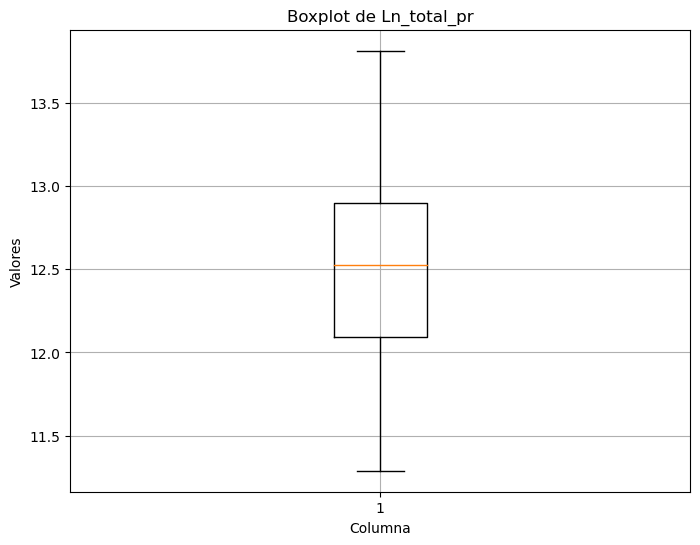

In [12]:
# Suponiendo que y_trainOLS es tu array
plt.figure(figsize=(8, 6))
plt.boxplot(y_trainOLS) ## revisar 'y_trainOLS'
plt.title('Boxplot de Ln_total_pr')
plt.xlabel('Columna')
plt.ylabel('Valores')
plt.grid(True)
plt.show()

El gráfico no nos muestra outliers, por tanto, podemos usar `y_trainOLS` sin problema (o al menos por ahora).

## 1.5. Elaboración del modelo

In [13]:
# Añadir una constante a X_trainOLS para estimar el intercepto
X_trainOLS = sm.add_constant(X_trainOLS)

# Crear el modelo de regresión lineal
ols = sm.OLS(y_trainOLS, X_trainOLS)

# Ajustar el modelo a los datos
resOLS = ols.fit()

# Imprimir el resumen del modelo
print(resOLS.summary())

                            OLS Regression Results                            
Dep. Variable:            Ln_total_pr   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     673.7
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:59:27   Log-Likelihood:                 675.22
No. Observations:                2889   AIC:                            -1284.
Df Residuals:                    2856   BIC:                            -1087.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Ponemos **a prueba** el modelo con los **datos de testeo**.

In [14]:
X_testOLS = sm.add_constant(X_testOLS)  # Agregar una constante para el término de intercepción
y_pred_testOLS = resOLS.predict(X_testOLS)  # Predicciones del modelo para los datos de prueba

Akram et al. (2024) utilizan cinco parámetros para medir el rendimiento del modelo: Mean Absolute Error (MAE), Relative Absolute Error (RAE), Root Mean Squared Error (RMSE), Root Relative Squared Error (RRSE) y el Coeficiente de determinación ($R^2$).

In [15]:
###Ojo que uso los datos de testeo
# Calcular el R^2
r2OLS = r2_score(y_testOLS, y_pred_testOLS)

# Calcular el MAE
maeOLS = mean_absolute_error(y_testOLS, y_pred_testOLS)

# Calcular el RMSE
rmseOLS = np.sqrt(mean_squared_error(y_testOLS, y_pred_testOLS))

# Calcular el RAE
raeOLS = maeOLS / abs(y_testOLS).mean()

# Calcular el RRSE
rrseOLS = rmseOLS / y_testOLS.std()

# Imprimir resultados
print("Coefficient of Determination (R2):", r2OLS)
print("Mean Absolute Error (MAE):", maeOLS)
print("Relative Absolute Error (RAE):", raeOLS)
print("Root Relative Squared Error (RRSE):", rrseOLS)
print("Root Mean Squared Error (RMSE):", rmseOLS)

Coefficient of Determination (R2): 0.8807755952856435
Mean Absolute Error (MAE): 0.14049045011813874
Relative Absolute Error (RAE): 0.011253047312032086
Root Relative Squared Error (RRSE): 0.3451095471257685
Root Mean Squared Error (RMSE): 0.18713182809017123


A esto pueden añadirle la **comprobación de los supuestos**. Ya saben cómo hacerlo, así que no necesitarán mi ayuda. (Por el momento, asumamos que el modelo es correcto y pasemos a ver las *redes neuronales* y los *random forest*)

Recuerden, también, que pueden guardar los resultados de su modelo. Vean el cuaderno `2-OLS`.

# 2. Red neuronal

## 2.1. Obtención y limpieza de datos

Cargamos las librerías necesarias.

In [16]:
from sklearn import preprocessing #para escalar/normalizar variables numéricas
import tensorflow as tf #Esta y las de abajo las necesitamos siempre para ANN y RF
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

## 2.2. Estandarización de los datos

Ya habíamos dividido previamente los datos de entrenamiento y testeo. Vamos a estandarizarlos por separado.

**Entrenamiento:**
- `X_trainOLS` --> `Xtrain_scale`
- `y_trainOLS` --> `ytrain_scale`

**Testeo:**
- `X_testOLS` --> `Xtest_scale`
- `y_trainOLS` --> `ytest_scale`

Como en el apartado anterior a `X_trainOLS` se le añadió una constante para elaborar el modelo OLS, vuelvo a definirla para evitar problemas. Sólo estoy copiando y pegando el código de hace un rato. 

In [17]:
# Dividir los datos en conjuntos de entrenamiento y testeo
X_trainOLS, X_testOLS, y_trainOLS, y_testOLS = train_test_split(
                                                    X_ols, y_ols, 
                                                    test_size=0.25, 
                                                    random_state=42 #Puede ser cualquier número
                                                    ) 

De las variables de mi base de datos, debo hacer un **one-hot encoding** para las categóricas y una **estandarización para las numéricas**. 

Empiezo buscando aquellas que pueden ser categóricas: contaré los valores únicos en cada columna y consideraré a aquellas con un número relativamente bajo de valores únicos como categóricas.

### 2.2.1. Estandarización de datos de entrenamiento

In [18]:
# Contar los valores únicos en cada columna
unique_counts = X_trainOLS.nunique()

# Filtrar las columnas con un número bajo de valores únicos (puedes ajustar este umbral según tu criterio)
categoricas = unique_counts[unique_counts < 5].index

categoricas

Index(['EPC_A_emision', 'EPC_B_emision', 'EPC_C_emision', 'EPC_D_emision',
       'EPC_E_emision', 'EPC_F_emision', 'EPC_G_emision', 'Muestra_2023',
       'Year_1982_2006', 'Year_After_2007', 'bool_aire_acondicionado',
       'bool_ascensor', 'bool_calefaccion', 'bool_piscina_comunitaria',
       'dum_mar_200m', 'grand_terr_20m2'],
      dtype='object')

He ido haciendo una revisión en Excel para diferenciar aquellas que ya están convertidas a un one-hot encoding de aquellas que aún necesitan pasar por ese proceso. **Ninguna necesita pasar el proceso de one-hote encoding**.

In [19]:
OHE=X_trainOLS[['EPC_A_emision', 'EPC_B_emision', 'EPC_C_emision', 'EPC_D_emision',
       'EPC_E_emision', 'EPC_F_emision', 'Muestra_2023', 
       'Year_1982_2006', 'Year_After_2007', 'bool_aire_acondicionado',
       'bool_ascensor', 'bool_calefaccion', 'bool_piscina_comunitaria',
       'dum_mar_200m', 'grand_terr_20m2']]

Selecciono las X numéricas.

In [20]:
# Crear una lista con todas las columnas binarias
columnas_a_eliminar = list(OHE.columns)

# Eliminar las columnas binarias de X_trainOLS para quedarme sólo con las numéricas
X2 = X_trainOLS.drop(columns=columnas_a_eliminar)

Ahora hago la **estandarización** sobre las X que son numéricas.

In [21]:
#Estandarizamos los valores de X3
min_max_scaler = preprocessing.MinMaxScaler() #preprocessing es una función de la librearía 
                                              #sklearn, ya sabe lo que hacer
X3 = min_max_scaler.fit_transform(X2)

Si quiero ver información sobre X3 me encontraré lo siguiente...

In [22]:
#X3.info()

In [23]:
type(X3)

numpy.ndarray

X3 ya no es un dataframe, sino un array. Python los entiende de manera distinta. Es como si uno fuera un archivo XLSX y el otro un archivo CSV; es decir, contienen la misma información pero un formato distinto. Sin embargo, *keras* y *tensorflow* suelen preferir los arrays (son menos pesados); por tanto, vamos a convertir **OHE** para luego unir todos en un mismo objeto. 

Recuerden que tanto **OHE** como **X3** son las variables independientes de nuestro modelo: la primera tiene variables binarias (valores 0 y 1), mientras que X3 son las variables numéricas que ya hemos estandarizado.

In [24]:
# Convertir OHE a un array NumPy
OHE_array=OHE.values

# Concatenar X3, y OHE_array a lo largo del eje de las columnas (axis=1)
Xtrain_scale = np.concatenate((X3,OHE_array), axis=1)

Cuando elabore el modelo de redes neuronales, voy a necesitar saber cuántas variables independientes tengo (X), asi que para eso cuento la cantidad de columnas que tienen mi array *Xtrain_scale*.

In [25]:
Xtrain_scale.shape[1]

32

Por si acaso, también convierto las Y en array.

In [26]:
ytrain_scale = y_trainOLS.values

### 2.2.2. Estandarización de datos de testeo

In [27]:
OHE2=X_testOLS[['EPC_A_emision', 'EPC_B_emision', 'EPC_C_emision', 'EPC_D_emision',
       'EPC_E_emision', 'EPC_F_emision', 'Muestra_2023', 
       'Year_1982_2006', 'Year_After_2007', 'bool_aire_acondicionado',
       'bool_ascensor', 'bool_calefaccion', 'bool_piscina_comunitaria',
       'dum_mar_200m', 'grand_terr_20m2']]

# Crear una lista con todas las columnas binarias
columnas_a_eliminar = list(OHE2.columns)

# Eliminar las columnas binarias de X_testOLS para quedarme sólo con las numéricas
X2_2 = X_testOLS.drop(columns=columnas_a_eliminar)

#Estandarizamos los valores de X3
X3_2 = min_max_scaler.fit_transform(X2_2)

# Convertir OHE a un array NumPy
OHE2_array=OHE2.values

# Concatenar X3, y OHE_array a lo largo del eje de las columnas (axis=1)
Xtest_scale = np.concatenate((X3_2,OHE2_array), axis=1)

# Convierto la Y en array también
ytest_scale = y_testOLS.values

## 2.3. Elaboración del modelo

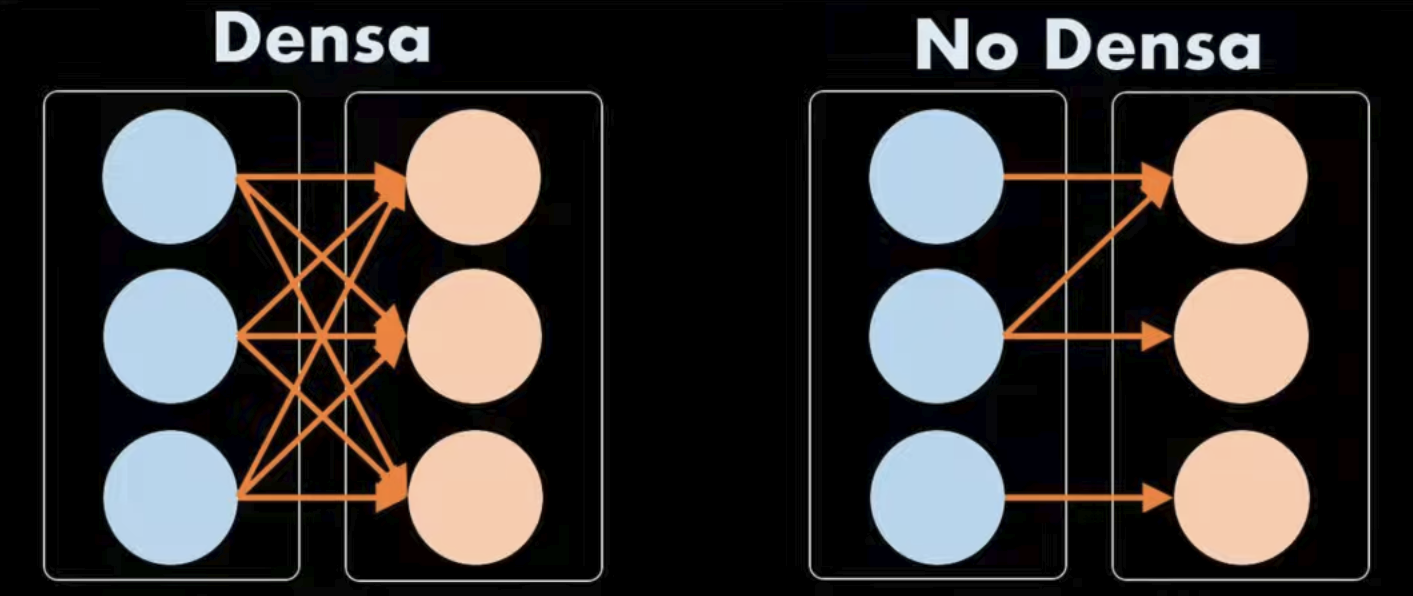

In [28]:
model = Sequential([
    Dense(128, activation='relu', #ReLU=Rectified Linear Unit
    input_shape=(32,)), #### Noten que acá va la cantidad de X #####
    Dense(64, activation='relu'),
    Dense(1,activation='relu')  #Queremos una sola salida
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.005), #Valor usado en la literatura
    loss='mean_squared_error', 
    metrics=['accuracy'] #Es como nuestro R^2
)

nnmodel = model.fit(Xtrain_scale, ytrain_scale, epochs=1000, #Valor usado en la literatura
               callbacks=[EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)], #Valores usados en la literatura
               batch_size=6, #Valor usado en la literatura
               verbose=False, #Sólo para que no imprima muchas cosas mientras procesa el modelo
               validation_split=0.3 #Valor usado en la literatura
              )

Algunos conceptos a tener en cuenta:

- **Optimizador Adam**: Está relacionado con el [backpropagation](https://www.sciencedirect.com/topics/computer-science/backpropagation-algorithm). Imagina que quieres encontrar el punto más bajo en una montaña con los ojos vendados y solo puedes sentir la inclinación de la pendiente donde estás parado. Quieres llegar al fondo de la montaña lo más rápido posible. Adam es como un guía que te ayuda a encontrar el punto más bajo de la montaña (es decir, el mínimo de la función de pérdida en el espacio de parámetros de tu modelo) de manera que no vayas demasiado rápido (lo que podría hacer que te saltes el punto más bajo) ni demasiado lento (lo que podría hacer que te quedes atascado en un lugar poco profundo). Su valor (*learning rate*) no se mide en segundos, si no que está relacionado con la rapidez con la que el algoritmo ajusta los pesos del modelo durante el proceso de entrenamiento. En general, los valores más comunes suelen estar en el rango de 0.001 a 0.01.

- **Error cuadrático medio (mean squared error)**: Le "dice" al modelo que es mejor tener una gran cantidad de errores pequeños a una poca cantidad de errores grandes.

- **Épocas**: Son simplemente el número de veces que todo el conjunto de datos de entrenamiento se ha pasado a través de la red neuronal durante el proceso de entrenamiento.

- **Batch Size**:
    Se refiere al número de ejemplos de entrenamiento que se utilizan en una iteración del proceso de entrenamiento. En lugar de pasar todo el conjunto de datos a través de la red neuronal de una vez (lo que se conoce como entrenamiento en batch), el conjunto de datos se divide en lotes más pequeños. El modelo se actualiza después de procesar cada lote. Un tamaño de lote más grande puede acelerar el proceso de entrenamiento, pero también puede requerir más memoria de tu PC. Un tamaño de lote más pequeño puede hacer que el entrenamiento sea más lento, pero puede mejorar la generalización del modelo.

- **Early Stopping**:
    Es una técnica para detener el proceso de entrenamiento una vez que el rendimiento del modelo deja de mejorar en un conjunto de datos de validación (esto lo entienden revisando el concepto de *validation split*). La **patience** indica cuántas épocas permitir sin mejoras en la métrica de validación antes de detener el entrenamiento. **restore_best_weights** indica que después de detener el entrenamiento, el modelo restaurará los pesos que tuvo en la época en la que tuvo el mejor desempeño en términos de la métrica de validación, lo que evita que el modelo se sobreajuste.

- **Validation Split**:
    Se refiere a la fracción del conjunto de datos que se reserva para la validación durante el entrenamiento. Por ejemplo, si tienes 1000 muestras y estableces un validation split del 0.3, se utilizarán 700 muestras para entrenar el modelo y 300 muestras para validar su desempeño durante el entrenamiento. Esto ayuda a evaluar el rendimiento del modelo en datos que no ha visto durante el entrenamiento y a detectar si el modelo está sobreajustando los datos de entrenamiento. Es como una segunda muestra de prueba.

In [29]:
# Predicciones en el conjunto de testeo
y_predANN = model.predict(Xtest_scale)

# Coefficient of determination (R2)
r2ANN = r2_score(ytest_scale, y_predANN)

# Mean Absolute Error (MAE)
maeANN = mean_absolute_error(ytest_scale, y_predANN)

# Relative Absolute Error (RAE)
raeANN = np.sum(np.abs(y_predANN - ytest_scale)) / np.sum(np.abs(np.mean(ytest_scale) - ytest_scale))

# Root Relative Squared Error (RRSE)
rrseANN = np.sqrt(np.sum((y_predANN - ytest_scale) ** 2) / np.sum((np.mean(ytest_scale) - ytest_scale) ** 2))

# Root Mean Squared Error (RMSE)
rmseANN = np.sqrt(mean_squared_error(ytest_scale, y_predANN))

# Imprimir resultados
print("Coefficient of Determination (R2):", r2ANN)
print("Mean Absolute Error (MAE):", maeANN)
print("Relative Absolute Error (RAE):", raeANN)
print("Root Relative Squared Error (RRSE):", rrseANN)
print("Root Mean Squared Error (RMSE):", rmseANN)

31/31 [==============================] - 0s 552us/step
Coefficient of Determination (R2): 0.7770162245225777
Mean Absolute Error (MAE): 0.20325887386677843
Relative Absolute Error (RAE): 1387.1506524857268
Root Relative Squared Error (RRSE): 45.92571327835283
Root Mean Squared Error (RMSE): 0.25591851741878935


Guardamos.

In [30]:
import pickle

# Guardar el modelo
model.save("modelos/NN5-BCN4K")

# Guardar el historial
with open("modelos/NN5-BCN4K/history.pkl", "wb") as f:
    pickle.dump(nnmodel.history, f)

INFO:tensorflow:Assets written to: modelos/NN5-BCN4K\assets


INFO:tensorflow:Assets written to: modelos/NN5-BCN4K\assets


### 2.3.1. Evaluación de los parámetros

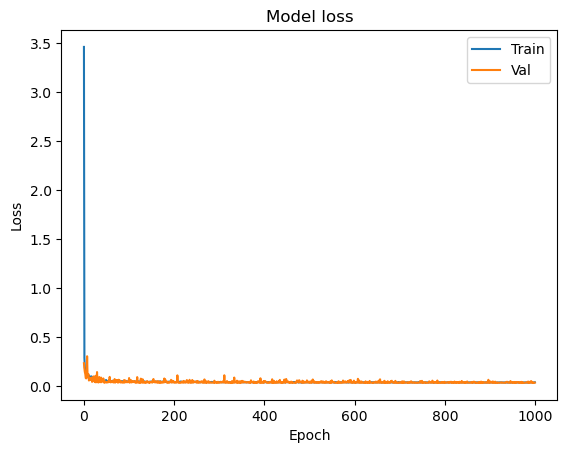

In [31]:
plt.plot(nnmodel.history['loss'])
plt.plot(nnmodel.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### 2.3.2. Importancia de las variables

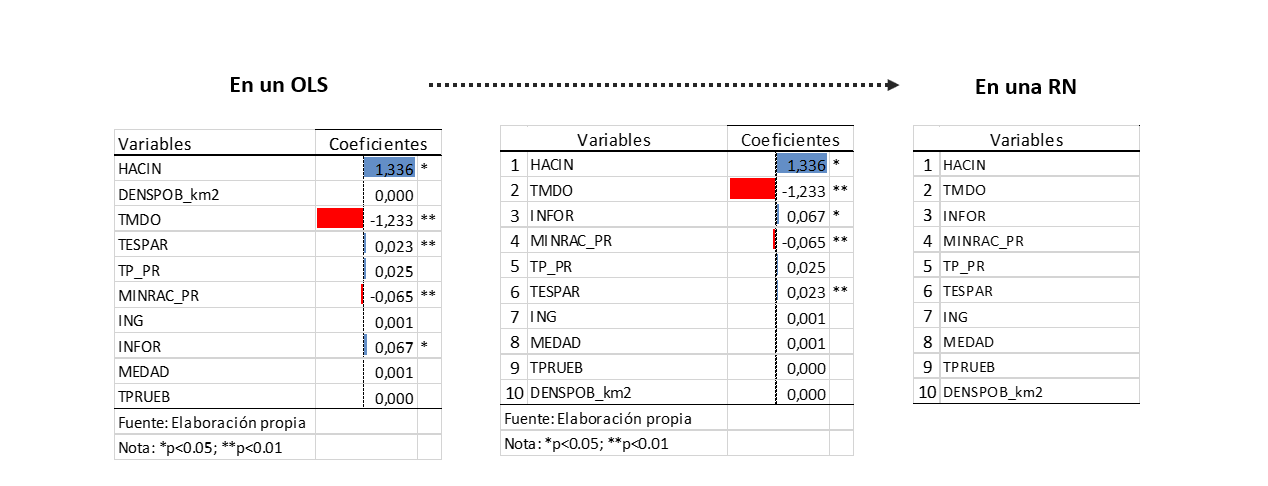

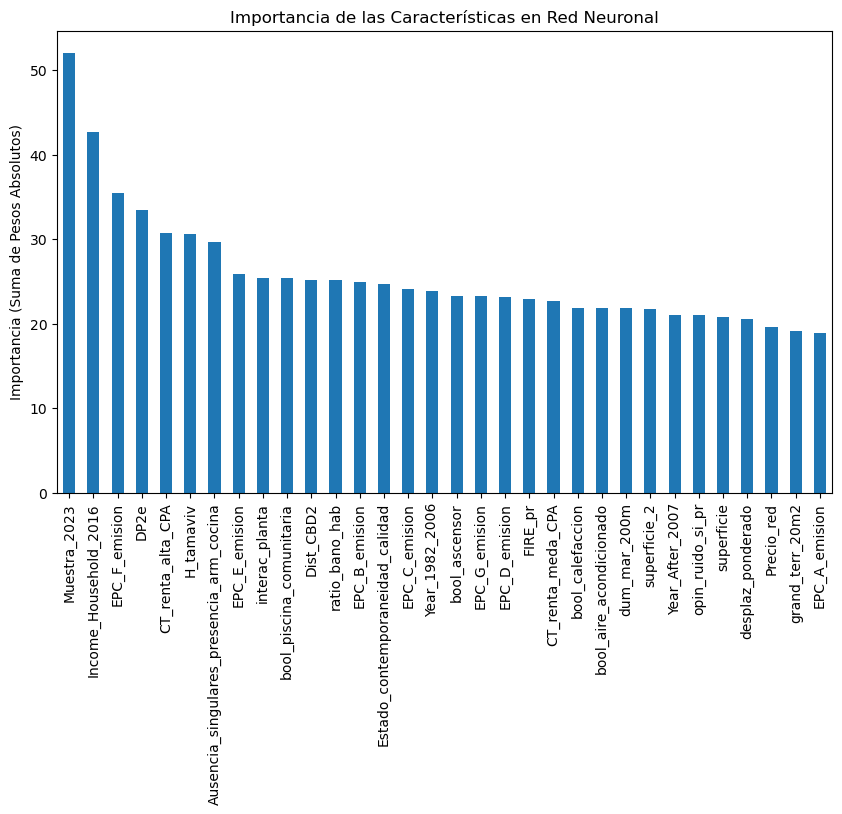

In [32]:
# Obtener los pesos de la red neuronal
weights = model.get_weights()

# Crear un DataFrame con los pesos y sus correspondientes nombres de características
weights_df = pd.DataFrame(weights[0].T, columns=X_ols.columns)  # X_ols se usa sólo para capturar los
                                                                # nombres de las columnas

# Calcular la importancia de las características sumando los valores absolutos de los pesos
feature_importance = weights_df.abs().sum()

# Ordenar la importancia de las características
feature_importance = feature_importance.sort_values(ascending=False)

# Crear un gráfico de barras para visualizar la importancia
feature_importance.plot(kind='bar', figsize=(10, 6))
plt.title('Importancia de las Características en Red Neuronal')
plt.ylabel('Importancia (Suma de Pesos Absolutos)')
plt.show()

La importancia de las características en una red neuronal se refiere a **cuánto contribuye cada característica al rendimiento general del modelo**, y se determina examinando los pesos asociados a cada característica en la red neuronal.

Cuando se entrena una red neuronal, durante el backpropagation, los pesos se ajustan para minimizar la función de pérdida, lo que permite que el modelo haga predicciones más precisas. La magnitud de estos pesos refleja la contribución relativa de cada característica a las predicciones del modelo.

# 3. Random Forest

## 3.1. Preparación de datos

Identifico mis *X* y mi *Y*.

In [33]:
# Definir las variables independientes (X) y dependiente (y)
X_RF = df.drop('Ln_total_pr', axis=1)  # Todas las columnas excepto 'Ln_total_pr'
y_RF = df['Ln_total_pr']  # Columna 'Ln_total_pr' 

## 3.2. Elaboración del modelo

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(criterion="squared_error",
                                 n_estimators=300, #N de árboles. Literatura indica que esto es prueba y error 
                                 max_depth=None,#Se expandirá en función del siguiente parámetro
                                 min_samples_split=2, #Revisar con QGIS
                                 min_samples_leaf=1, #Revisar con QGIS
                                 max_features=None, #Cantidad total de columnas
                                 bootstrap=True,
                                 oob_score=True, #Muestras OOB
                                 random_state=42, #Semilla de aleatorización. Puede ser cualquier número
                                 )
# Entrenar el modelo
rf_model.fit(X_RF, y_RF)

RandomForestRegressor(max_features=None, n_estimators=300, oob_score=True,
                      random_state=42)

Pueden leer más sobre los parámetros del modelo en [este enlace](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

Ahora calculo los **parámetros de evaluación con base en las muestras OOB**.

In [35]:
# Obtener las predicciones del modelo para las muestras OOB
oob_predictions = rf_model.oob_prediction_

# Calcular el coeficiente de determinación (R2)
r2RF = r2_score(y_RF, oob_predictions)

# Calcular el error absoluto medio (MAE)
maeRF = mean_absolute_error(y_RF, oob_predictions)

# Calcular el error absoluto relativo (RAE)
raeRF = np.mean(np.abs((y_RF - oob_predictions) / np.mean(y_RF)))

# Calcular el error cuadrático medio (RMSE)
rmseRF = np.sqrt(mean_squared_error(y_RF, oob_predictions))

# Calcular la raíz del error cuadrático medio relativo (RRSE)
rrseRF = np.sqrt(np.mean((y_RF - oob_predictions) ** 2) / np.mean(y_RF ** 2))

# Imprimir resultados
print("Coefficient of Determination (R2):", r2RF)
print("Mean Absolute Error (MAE):", maeRF)
print("Relative Absolute Error (RAE):", raeRF)
print("Root Relative Squared Error (RRSE):", rrseRF)
print("Root Mean Squared Error (RMSE):", rmseRF)

Coefficient of Determination (R2): 0.8848347707722122
Mean Absolute Error (MAE): 0.13811620992442428
Relative Absolute Error (RAE): 0.011038751400723279
Root Relative Squared Error (RRSE): 0.015059541727849728
Root Mean Squared Error (RMSE): 0.1886099047066123


En caso quieran ver cuántas muestras fueron consideradas como OOB.

In [36]:
# Obtener el número de muestras OOB
num_oob_samples = len(y_RF) - int(len(y_RF) * rf_model.oob_score_)

print("Número total de muestras OOB:", num_oob_samples)

Número total de muestras OOB: 444


In [37]:
import joblib

# Guardar el modelo de Random Forest
joblib.dump(rf_model, 'modelos/RF4-BCN4K.pkl')

['modelos/RF4-BCN4K.pkl']

## 3.3. Evaluación de los parámetros

### 3.3.1. N° árboles

C:\Users\rojas\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

C:\Users\rojas\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



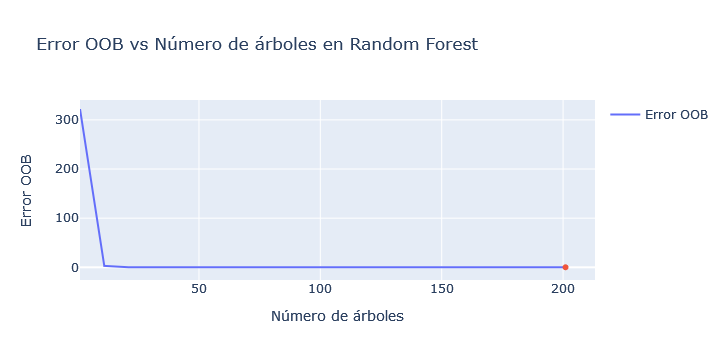

In [47]:
import plotly.graph_objects as go

# Definir el rango de número de árboles a considerar
tree_range = range(1, 202, 10)  # Probamos desde 1 hasta 200 árboles, de 10 en 10

# Inicializar lista para almacenar los errores OOB
oob_errors = []

# Iterar sobre el rango de número de árboles
for n_trees in tree_range:
    rf_model = RandomForestRegressor(criterion="squared_error",n_estimators=n_trees, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, bootstrap=True, oob_score=True, random_state=42)
    rf_model.fit(X_RF, y_RF)
    oob_errors.append(1 - rf_model.oob_score_)

# Encontrar el número de árboles con el menor error OOB
best_num_trees = tree_range[np.argmin(oob_errors)]

# Crear figura interactiva
fig = go.Figure()

# Agregar el gráfico de línea
fig.add_trace(go.Scatter(x=list(tree_range), y=oob_errors, mode='lines', name='Error OOB'))

# Añadir marcador en el punto más bajo de Y
fig.add_trace(go.Scatter(x=[best_num_trees], y=[min(oob_errors)], mode='markers', name='Mínimo error OOB',
                         text=[f'Mínimo error OOB en {best_num_trees} árboles'], showlegend=False))

# Actualizar diseño del gráfico
fig.update_layout(title='Error OOB vs Número de árboles en Random Forest',
                   xaxis_title='Número de árboles',
                   yaxis_title='Error OOB')

# Mostrar gráfico interactivo
fig.show()

El error de las muestras Out-of-Bag (OOB) en un modelo RandomForest se calcula de la siguiente manera:

1. Para cada muestra en el conjunto de datos de entrenamiento, se determina en cuántos árboles no se utilizó para entrenar ese punto específico. Estos árboles que no se utilizan para entrenar una muestra específica se conocen como árboles Out-of-Bag para esa muestra.

2. Luego, para cada muestra, se promedian las predicciones de los árboles Out-of-Bag que no la utilizaron para entrenamiento.

3. Finalmente, se compara esta predicción promediada con la verdadera etiqueta de la muestra para calcular el error, que es típicamente la diferencia cuadrada entre la predicción y la etiqueta verdadera.

4. El error OOB se calcula promediando estos errores individuales sobre todas las muestras del conjunto de entrenamiento.

Interpretar este error puede ser complicado cuando nuestra *Y* es un variable logaritmizada. Para tener una idea más clara sobre él, podemos aplicar una función exponencial para que el número represente la unidad de la variable en su estado natural: los euros.

In [39]:
np.exp(0.11)

1.1162780704588713

### 3.3.2. N° de observaciones (filas)

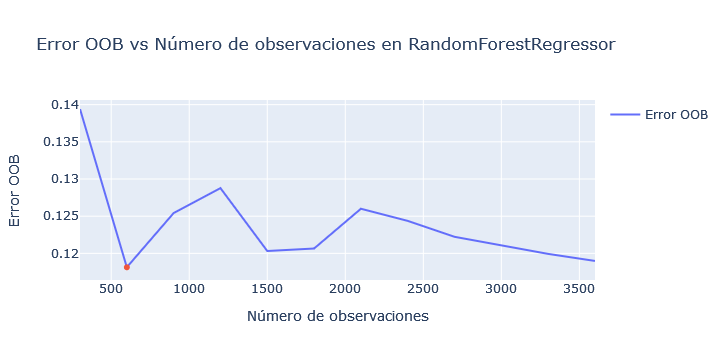

In [46]:
# Convertir el rango de número de observaciones a considerar en una lista
sample_range = list(range(300, len(X_RF) + 1, 300))  # Incremento de 300 para el rango de muestra

# Inicializar lista para almacenar los errores OOB
oob_errors = []

# Iterar sobre el rango de número de observaciones
for sample_size in sample_range:
    # Subconjunto de datos
    X_sample = X_RF[:sample_size]
    y_sample = y_RF[:sample_size]
    
    # Crear y ajustar el modelo RandomForestRegressor con OOB
    rf_model = RandomForestRegressor(criterion="squared_error",n_estimators=300, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, bootstrap=True, oob_score=True, random_state=42)
    rf_model.fit(X_sample, y_sample)
    
    # Calcular el error OOB y almacenarlo
    oob_errors.append(1 - rf_model.oob_score_)

# Encontrar el número de observaciones con el menor error OOB
best_sample_size = sample_range[np.argmin(oob_errors)]

# Crear el gráfico interactivo
fig = go.Figure()

# Agregar la línea de error OOB vs número de observaciones
fig.add_trace(go.Scatter(x=sample_range, y=oob_errors, mode='lines', name='Error OOB'))

# Añadir texto con el número de observaciones con el menor error OOB
fig.add_trace(go.Scatter(x=[best_sample_size], y=[min(oob_errors)], mode='markers', name='Mínimo error OOB',
                         text=[f'Mínimo error OOB en {best_sample_size} observaciones'], showlegend=False))

# Personalizar diseño del gráfico
fig.update_layout(title='Error OOB vs Número de observaciones en RandomForestRegressor',
                  xaxis_title='Número de observaciones',
                  yaxis_title='Error OOB')

# Mostrar el gráfico interactivo
fig.show()

In [41]:
np.exp(0.11)

1.1162780704588713

### 3.3.3. N° de variables (columnas)

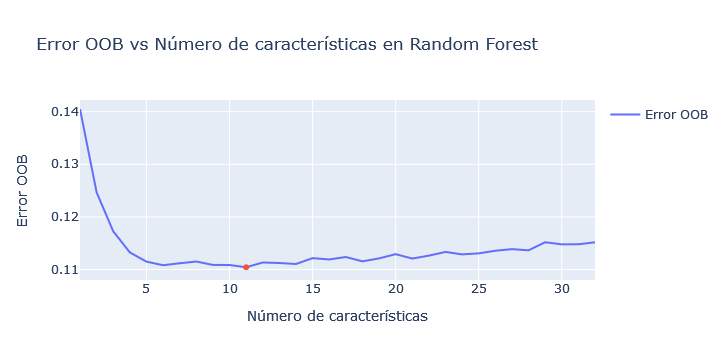

In [42]:
# Definir el rango de número de características a considerar
feature_range = range(1, len(X_RF.columns) + 1)

# Inicializar lista para almacenar los errores OOB
oob_errors = []

# Iterar sobre el rango de número de características
for n_features in feature_range:
    rf_model = RandomForestRegressor(criterion="squared_error",n_estimators=300, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=n_features, bootstrap=True, oob_score=True, random_state=42)
    rf_model.fit(X_RF, y_RF)
    oob_errors.append(1 - rf_model.oob_score_)

# Encontrar el número de características con el menor error OOB
best_num_features = feature_range[np.argmin(oob_errors)]

# Crear figura interactiva
fig = go.Figure()

# Agregar el gráfico de línea
fig.add_trace(go.Scatter(x=list(feature_range), y=oob_errors, mode='lines', name='Error OOB'))

# Añadir marcador en el punto más bajo de Y
fig.add_trace(go.Scatter(x=[best_num_features], y=[min(oob_errors)], mode='markers', name='Mínimo error OOB',
                         text=[f'Mínimo error OOB con {best_num_features} características'], showlegend=False))

# Actualizar diseño del gráfico
fig.update_layout(title='Error OOB vs Número de características en Random Forest',
                   xaxis_title='Número de características',
                   yaxis_title='Error OOB')

# Mostrar gráfico interactivo
fig.show()

In [43]:
np.exp(0.11)

1.1162780704588713

## 3.4. Peso de las variables

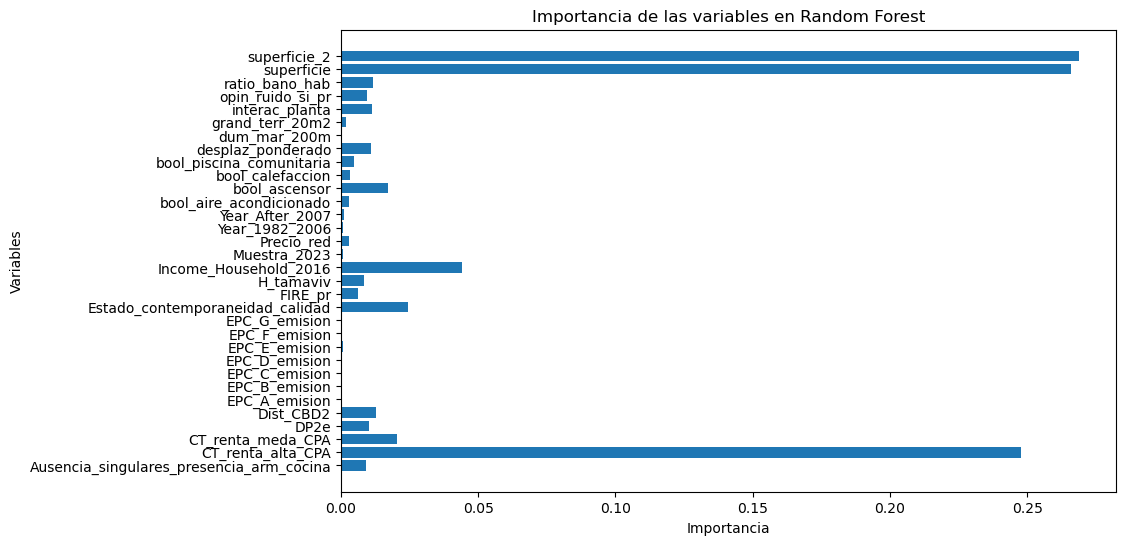

In [44]:
# Calcular la importancia de las variables
feature_importance = rf_model.feature_importances_

# Obtener nombres de las variables
feature_names = X_RF.columns

# Graficar la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables en Random Forest')
plt.show()

La importancia se calcula en función de la disminución media de la precisión del modelo cuando una variable se excluye del modelo. Las variables con mayores disminuciones en la precisión después de ser excluidas se consideran más importantes para el modelo. Usualmente se usa un [indicador Gini](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_) para el cálculo.

## 4. Comparación de modelos

In [45]:
# Crear un diccionario con los datos
data = {
    'Modelo': ['OLS', 'ANN', 'RF'],
    'R2': [r2OLS, r2ANN, r2RF],
    'MAE': [maeOLS, maeANN, maeRF],
    'RAE': [raeOLS, raeANN, raeRF],
    'RRSE': [rrseOLS, rrseANN, rrseRF],
    'RMSE': [rmseOLS, rmseANN, rmseRF ]
}

# Crear un DataFrame con los datos
comparacion = pd.DataFrame(data)

# Mostrar la tabla
print(comparacion)

  Modelo        R2       MAE          RAE       RRSE      RMSE
0    OLS  0.880776  0.140490     0.011253   0.345110  0.187132
1    ANN  0.777016  0.203259  1387.150652  45.925713  0.255919
2     RF  0.884835  0.138116     0.011039   0.015060  0.188610
